In [1]:
 #load Raw data from TDT ECoG maschine, plz run ""
import numpy as np
import scipy.io as scio
from scipy import signal
import tdt
import os
import  wave
import matplotlib.pyplot as plt
import json
from scipy.fftpack import fft
from random import shuffle
import h5py
import scipy.io as scio
import scipy.io.wavfile
import math
import mne
import os
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor
import torch
from torch.utils import data as Data
import torch.nn as nn
import seaborn as sns
from ecog_band import EcogBandRes
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset,Dataset
from ecog_band.solver import Nfold_solver
from ecog_band.models import ECOGRes50_feature,ECOGRes50
from ecog_band.datasetSigband import CustomDatasetSigband
from ecog_band.utils import *


/root/pp/covert-reading/Ecog_pretrain/ecog_band/solver.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # may raise warning about Jupyter


In [2]:
bands_list=['else1','delta','theta','alpha','beta', 'gamma','high gamma','else2']
# bands_list=['gamma','high gamma']
HS=86
freq=500
elec=7
band = 'All_bands'

best_fold_model_path = '/root/pp/covert-reading/Ecog_pretrain/best_models'
y_save_path_delete = f'/root/pp/covert-reading/Ecog_pretrain/fold_results/HS{HS}/{freq}/{elec}'
y_save_path_shuffle = f'/root/pp/covert-reading/Ecog_pretrain/fold_results_shuffle/HS{HS}/{freq}/{elec}'

os.makedirs(y_save_path_delete, exist_ok=True)
os.makedirs(y_save_path_shuffle, exist_ok=True)

# all band do binary classification

In [3]:
delete_baseline = 0.86
shuffle_baseline = 0.85

# calculate contribution for each band(delete)

In [5]:
# calculate contribution for each band
baseline_accuracy = delete_baseline
contributions_list = []

for band in bands_list:
    # print(band)
    badn_acc = cal_acc_band1_from_y(y_save_path_delete, band)
    contribution = baseline_accuracy - badn_acc
    print(f'band: {band}, contribution_acc:{contribution}')
    contributions_list.append(contribution)

np.save(os.path.join(y_save_path_delete, f'new_contributions.npy'), contributions_list)

band: else1, contribution_acc:0.135
band: delta, contribution_acc:0.09333333333333327
band: theta, contribution_acc:0.170515873015873
band: alpha, contribution_acc:0.27493055555555557
band: beta, contribution_acc:0.3169444444444445
band: gamma, contribution_acc:0.07373456790123456
band: high gamma, contribution_acc:0.09333333333333327
band: else2, contribution_acc:0.12388888888888883


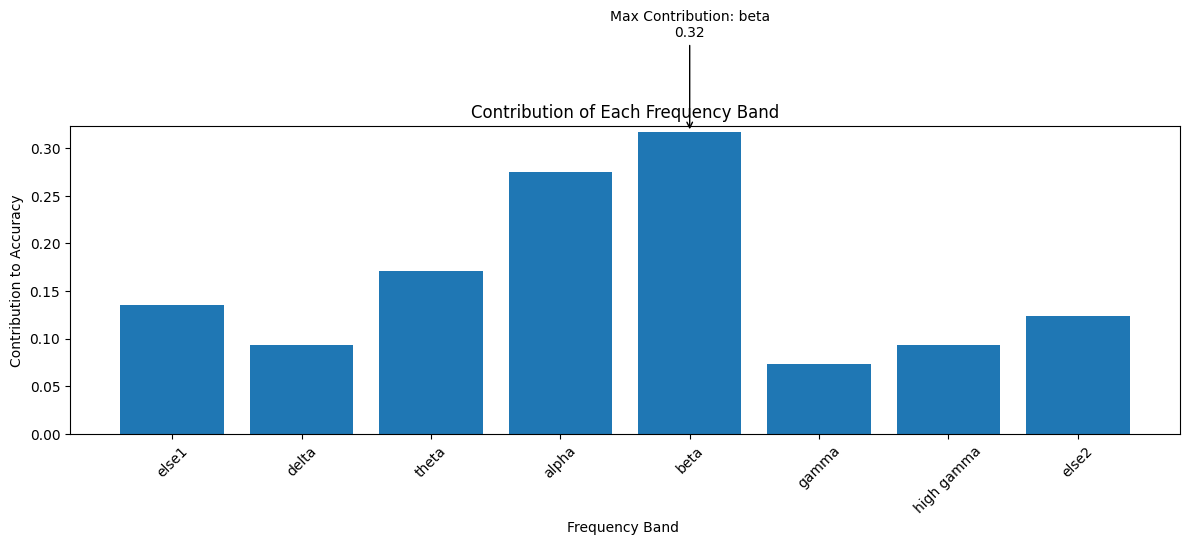

In [6]:
# plt contribution bar
contribution_list = np.load(os.path.join(y_save_path_delete, f'new_contributions.npy'))
pltbar_contribution(contribution_list, bands_list)

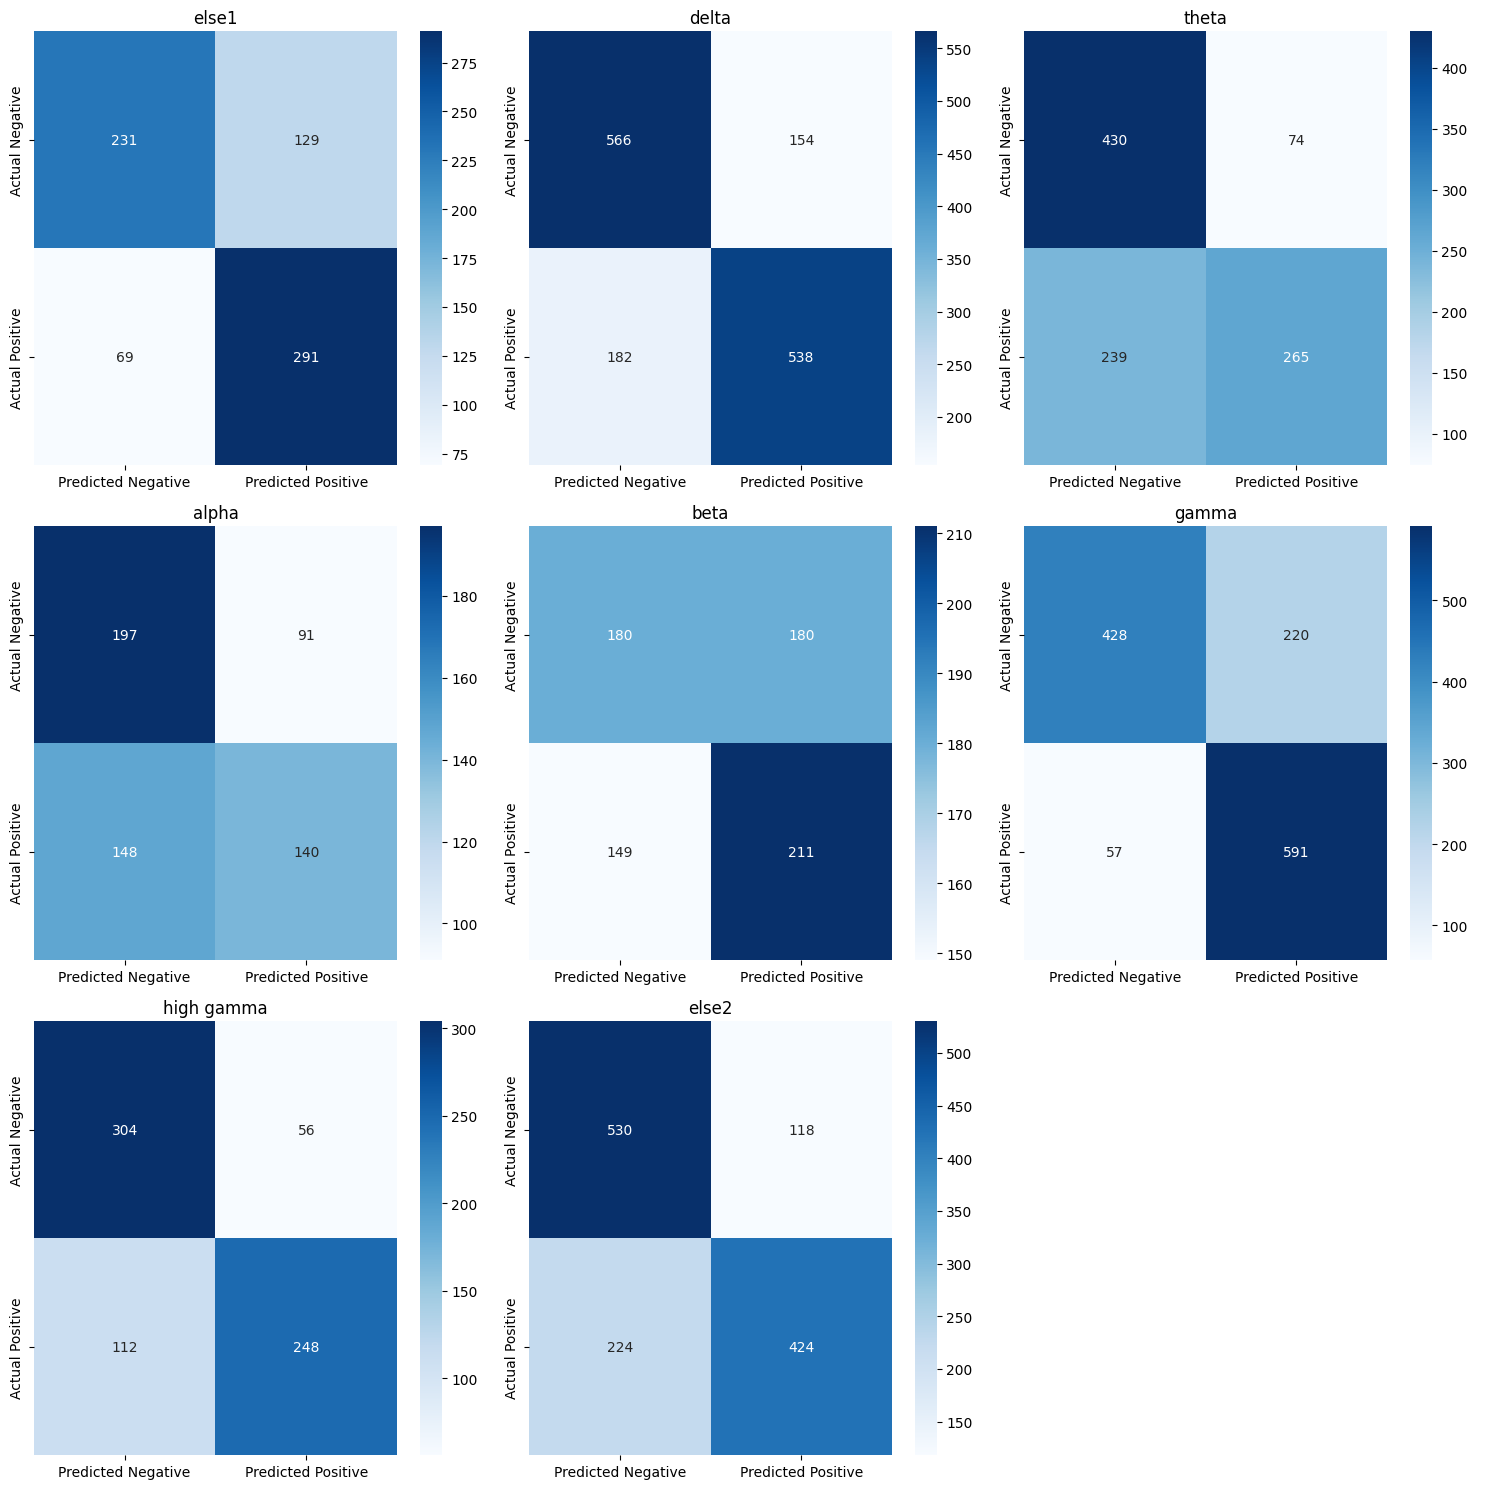

In [10]:
# plot all confusion matrix on one graph
cm = {}
for band in bands_list:
    cm[band] = cal_cm_band1_from_y(y_save_path_delete, band)

plt_allband_confusion_matrices(cm, bands_list)

# calculate contribution for each band(shuffle)

In [8]:
# calculate contribution for each band
baseline_accuracy = shuffle_baseline
contributions_list = []

for band in bands_list:
    # print(band)
    badn_acc = cal_acc_band1_from_y(y_save_path_shuffle, band)
    contribution = baseline_accuracy - badn_acc
    print(f'band: {band}, contribution_acc:{contribution}')
    contributions_list.append(contribution)

np.save(os.path.join(y_save_path_shuffle, f'new_contributions.npy'), contributions_list)

band: else1, contribution_acc:0.08784722222222219
band: delta, contribution_acc:0.07839506172839505
band: theta, contribution_acc:0.06825396825396823
band: alpha, contribution_acc:0.08194444444444438
band: beta, contribution_acc:0.09999999999999998
band: gamma, contribution_acc:0.16365740740740742
band: high gamma, contribution_acc:0.13587962962962963
band: else2, contribution_acc:0.07453703703703707


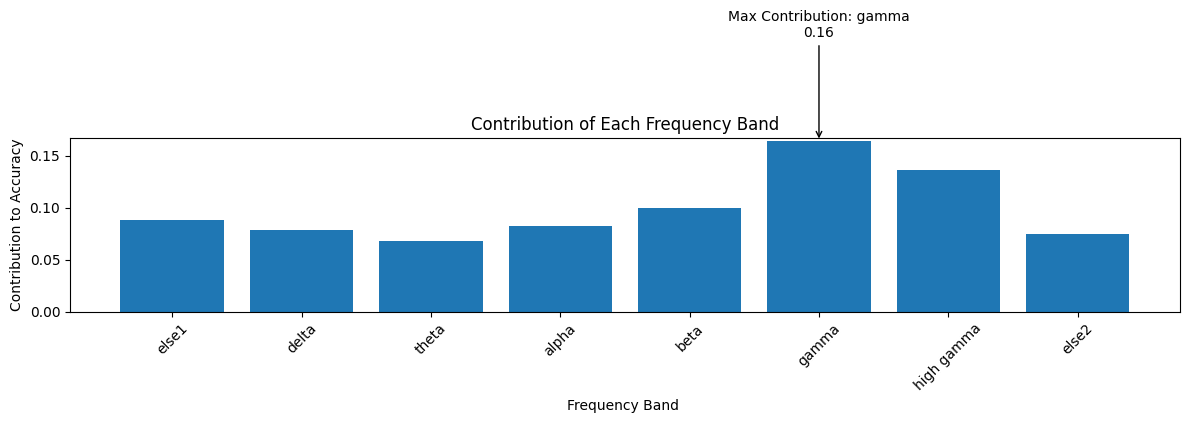

In [11]:
# plt contribution bar
contribution_list = np.load(os.path.join(y_save_path_shuffle, f'new_contributions.npy'))
pltbar_contribution(contribution_list, bands_list)

In [12]:
# plot all confusion matrix on one graph
cm = {}
for band in bands_list:
    cm[band] = cal_cm_band1_from_y(y_save_path_shuffle, band)

plt_allband_confusion_matrices(cm, bands_list)